In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [46]:
df_all_bots = pd.read_csv('Logs/log_all_bots_same_skills.csv')

# Calculate win and draw rates for combined dataset
The combined dataset includes all games, where a Bot plays against a copy of itself

In [47]:
# Extract wins and draws for combined dataset
total_games_all_bots = df_all_bots.shape[0]
wins_start_player_all_bots = df_all_bots[df_all_bots['starting player'] == df_all_bots['winning number']].shape[0]
wins_second_player_all_bots = df_all_bots[df_all_bots['starting player'] != df_all_bots['winning number']].shape[0] - df_all_bots[df_all_bots['winning number'] == 0].shape[0]
draws_all_bots = df_all_bots[df_all_bots['winning number'] == 0].shape[0]

# Calculate win rate for start/second player and draw rate 
win_rate_start_player_all_bots = wins_start_player_all_bots / total_games_all_bots
win_rate_second_player_all_bots = wins_second_player_all_bots / total_games_all_bots
draw_rate_all_bots = draws_all_bots / total_games_all_bots

print(win_rate_start_player_all_bots, win_rate_second_player_all_bots, draw_rate_all_bots)


0.256775 0.202275 0.54095


In [96]:
file_paths = {
    'Bot0': 'Logs/log_Bot0_Bot0.csv',
    'Bot1': 'Logs/log_Bot1_Bot1.csv',
    'Bot2': 'Logs/log_Bot2_Bot2.csv',
    'Bot3': 'Logs/log_Bot3_Bot3.csv',
}

results = {}

for bot_name, path in file_paths.items():
    data = pd.read_csv(path)
    total_games = data.shape[0]
    wins_start_player = data[data['starting player'] == data['winning number']].shape[0]
    wins_second_player = data[data['starting player'] != data['winning number']].shape[0] - data[data['winning number'] == 0].shape[0]
    draws = data[data['winning number'] == 0].shape[0]
    
    win_rate_start_player = wins_start_player / total_games
    win_rate_second_player = wins_second_player / total_games
    draw_rate = draws / total_games
    
    results[bot_name] = {
        'win_rate_start_player': win_rate_start_player,
        'win_rate_second_player': win_rate_second_player,
        'draw_rate': draw_rate
    }

results


{'Bot0': {'win_rate_start_player': 0.5233,
  'win_rate_second_player': 0.4074,
  'draw_rate': 0.0693},
 'Bot1': {'win_rate_start_player': 0.1416,
  'win_rate_second_player': 0.1028,
  'draw_rate': 0.7556},
 'Bot2': {'win_rate_start_player': 0.0816,
  'win_rate_second_player': 0.0348,
  'draw_rate': 0.8836},
 'Bot3': {'win_rate_start_player': 0.2806,
  'win_rate_second_player': 0.2641,
  'draw_rate': 0.4553}}

In [40]:
# # Kumulierte Darstellung der Gewinn- und Unentschiedenraten für alle Bots
# fig, ax = plt.subplots(figsize=(10, 6))

# # Breite der Balken
# bar_width = 0.2
# # Positionen der Balken
# r1 = range(len(bots))
# r2 = [x + bar_width for x in r1]
# r3 = [x + bar_width for x in r2]

# # Balken für Gewinnraten des Startspielers
# ax.bar(r1, [results[bot]['win_rate_start_player'] for bot in bots], color='blue', width=bar_width, label='Startspieler Gewinnrate')

# # Balken für Gewinnraten des zweiten Spielers
# ax.bar(r2, [results[bot]['win_rate_second_player'] for bot in bots], color='red', width=bar_width, label='Zweiter Spieler Gewinnrate')

# # Balken für Unentschiedenraten
# ax.bar(r3, [results[bot]['draw_rate'] for bot in bots], color='green', width=bar_width, label='Unentschiedenrate')

# # Achsenbeschriftung und Legende
# ax.set_xlabel('Bot')
# ax.set_ylabel('Rate')
# ax.set_title('Gewinn- und Unentschiedenraten für alle Bots')
# ax.set_xticks([r + bar_width for r in range(len(bots))])
# ax.set_xticklabels(bots)
# ax.legend()

# plt.tight_layout()
# plt.show()

# # Pie Charts
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# for i, bot_name in enumerate(bots):
#     sizes = [results[bot_name]['win_rate_start_player'], results[bot_name]['win_rate_second_player'], results[bot_name]['draw_rate']]
#     labels = ['Startspieler Gewinne', 'Zweiter Spieler Gewinne', 'Unentschieden']
#     colors = ['blue', 'red', 'green']
#     axes[i//2, i%2].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
#     axes[i//2, i%2].set_title(f'Ergebnisverteilung für {bot_name}')

# plt.tight_layout()
# plt.show()



# Plots mit Seaborn zur schöneren Darstellung

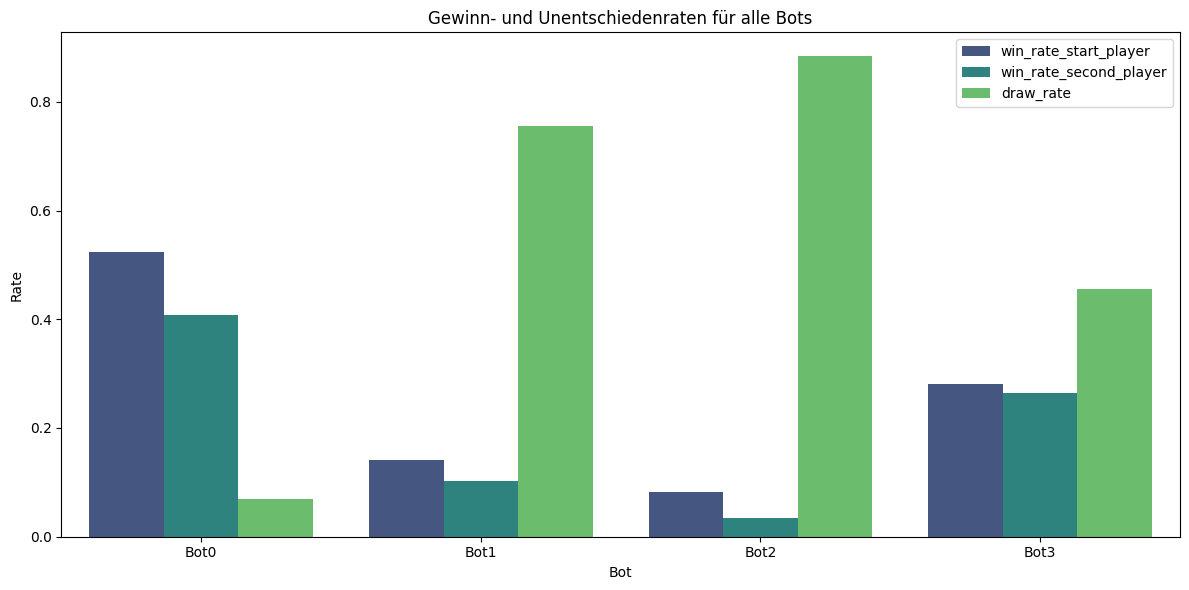

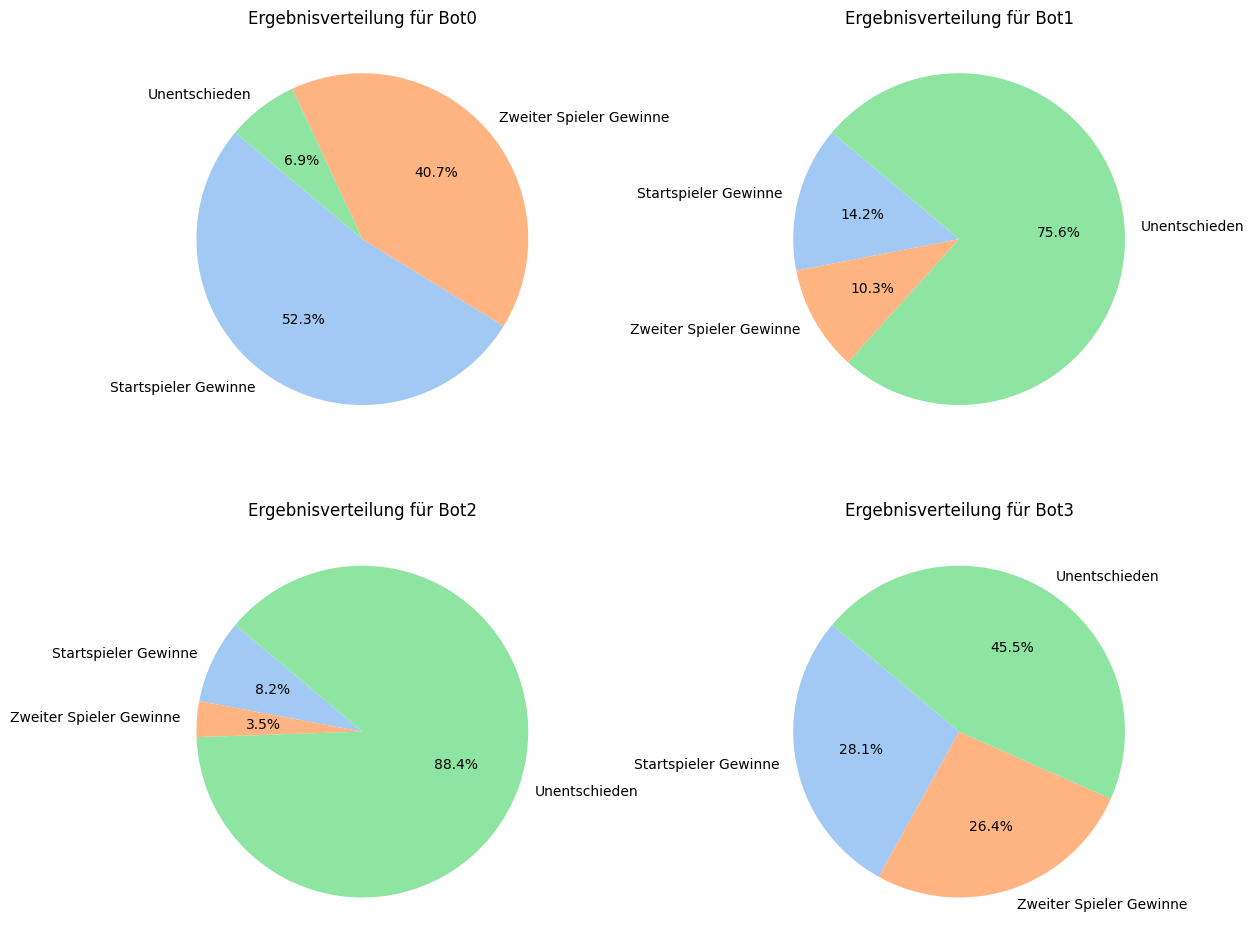

In [97]:
# convert dict to dataframe for seaborn
results_df = pd.DataFrame.from_dict(results, orient='index').reset_index().rename(columns={'index': 'Bot'})
# depivot data
results_df_melted = results_df.melt(id_vars=["Bot"], var_name="Ergebnis", value_name="Rate")
bots = list(results.keys())

# Bar charts
plt.figure(figsize=(12, 6))
sns.barplot(x='Bot', y='Rate', hue='Ergebnis', data=results_df_melted, palette='viridis')
plt.title('Gewinn- und Unentschiedenraten für alle Bots')
plt.ylabel('Rate')
plt.xlabel('Bot')
plt.legend()
plt.tight_layout()
plt.show()

# Pie Charts
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, bot_name in enumerate(bots):
    sizes = [results[bot_name]['win_rate_start_player'], results[bot_name]['win_rate_second_player'], results[bot_name]['draw_rate']]
    labels = ['Startspieler Gewinne', 'Zweiter Spieler Gewinne', 'Unentschieden']
    colors = sns.color_palette('pastel')[0:3]
    axes[i//2, i%2].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    axes[i//2, i%2].set_title(f'Ergebnisverteilung für {bot_name}')

plt.tight_layout()
plt.show()


In [102]:
# file path dict
file_paths_bot_pairs = {
    'Bot0_Bot0': 'Logs/log_Bot0_Bot0.csv',
    'Bot0_Bot1': 'Logs/log_Bot0_Bot1.csv',
    'Bot0_Bot2': 'Logs/log_Bot0_Bot2.csv',
    'Bot0_Bot3': 'Logs/log_Bot0_Bot3.csv',
    'Bot1_Bot1': 'Logs/log_Bot1_Bot1.csv',
    'Bot1_Bot2': 'Logs/log_Bot1_Bot2.csv',
    'Bot1_Bot3': 'Logs/log_Bot1_Bot3.csv',
    'Bot2_Bot2': 'Logs/log_Bot2_Bot2.csv',
    'Bot2_Bot3': 'Logs/log_Bot2_Bot3.csv',
    'Bot3_Bot3': 'Logs/log_Bot3_Bot3.csv'


    
}

# dict to store pairwise results
pairwise_results = {}

# load all data in file paths as dataframe and calculate winning and draw rates
for pair_name, path in file_paths_bot_pairs.items():
    data = pd.read_csv(path)
    total_games = data.shape[0]
    wins_start_player = data[data['starting player'] == 1][data['winning number'] == 1].shape[0] + data[data['starting player'] == 2][data['winning number'] == 1].shape[0]
    wins_second_player = data[data['starting player'] == 1][data['winning number'] == 2].shape[0] + data[data['starting player'] == 2][data['winning number'] == 2].shape[0]
    draws = data[data['winning number'] == 0].shape[0]
    
    win_rate_start_player = wins_start_player / total_games
    win_rate_second_player = wins_second_player / total_games
    draw_rate = draws / total_games
    
    
    pairwise_results[pair_name] = {
        'total_games': total_games,
        'win_rate_start_player': win_rate_start_player,
        'win_rate_second_player': win_rate_second_player,
        'draw_rate': draw_rate
    }

pairwise_results


/var/folders/0f/hnckk90x47ldd_cjc_28ypfc0000gn/T/ipykernel_6878/1140937340.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins_start_player = data[data['starting player'] == 1][data['winning number'] == 1].shape[0] + data[data['starting player'] == 2][data['winning number'] == 1].shape[0]
/var/folders/0f/hnckk90x47ldd_cjc_28ypfc0000gn/T/ipykernel_6878/1140937340.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins_start_player = data[data['starting player'] == 1][data['winning number'] == 1].shape[0] + data[data['starting player'] == 2][data['winning number'] == 1].shape[0]
/var/folders/0f/hnckk90x47ldd_cjc_28ypfc0000gn/T/ipykernel_6878/1140937340.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins_second_player = data[data['starting player'] == 1][data['winning number'] == 2].shape[0] + data[data['starting player'] == 2][data['winning number'] == 2].shape[0]
/var/folders/0f

{'Bot0_Bot0': {'total_games': 10000,
  'win_rate_start_player': 0.4685,
  'win_rate_second_player': 0.4622,
  'draw_rate': 0.0693},
 'Bot0_Bot1': {'total_games': 10000,
  'win_rate_start_player': 0.0961,
  'win_rate_second_player': 0.6705,
  'draw_rate': 0.2334},
 'Bot0_Bot2': {'total_games': 10000,
  'win_rate_start_player': 0.0181,
  'win_rate_second_player': 0.9081,
  'draw_rate': 0.0738},
 'Bot0_Bot3': {'total_games': 10000,
  'win_rate_start_player': 0.0002,
  'win_rate_second_player': 0.9996,
  'draw_rate': 0.0002},
 'Bot1_Bot1': {'total_games': 10000,
  'win_rate_start_player': 0.1158,
  'win_rate_second_player': 0.1286,
  'draw_rate': 0.7556},
 'Bot1_Bot2': {'total_games': 10000,
  'win_rate_start_player': 0.0353,
  'win_rate_second_player': 0.2778,
  'draw_rate': 0.6869},
 'Bot1_Bot3': {'total_games': 10000,
  'win_rate_start_player': 0.0154,
  'win_rate_second_player': 0.8481,
  'draw_rate': 0.1365},
 'Bot2_Bot2': {'total_games': 10000,
  'win_rate_start_player': 0.056,
  'wi

In [103]:
# convert results data to matrix
bot_names = ["Bot0", "Bot1", "Bot2", "Bot3"]
# empty win matrix
win_matrix = pd.DataFrame(0, index=bot_names, columns=bot_names)

# fill matrix with data
for pair, result in pairwise_results.items():
    # split bot pairings on '_' because of naming convention in file name
    bot1, bot2 = pair.split('_')
    
    win_matrix.at[bot1, bot2] = result['win_rate_start_player']
    win_matrix.at[bot2, bot1] = result['win_rate_second_player']


win_matrix


/var/folders/0f/hnckk90x47ldd_cjc_28ypfc0000gn/T/ipykernel_6878/725011209.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.4685' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  win_matrix.at[bot1, bot2] = result['win_rate_start_player']
/var/folders/0f/hnckk90x47ldd_cjc_28ypfc0000gn/T/ipykernel_6878/725011209.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0961' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  win_matrix.at[bot1, bot2] = result['win_rate_start_player']
/var/folders/0f/hnckk90x47ldd_cjc_28ypfc0000gn/T/ipykernel_6878/725011209.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0181' has dtype incompatible with int64, please explicitly cast to a compatible dtype f

,Bot0,Bot1,Bot2,Bot3
Bot0,0.4622,0.0961,0.0181,0.0002
Bot1,0.6705,0.1286,0.0353,0.0154
Bot2,0.9081,0.2778,0.0604,0.0336
Bot3,0.9996,0.8481,0.4707,0.2703


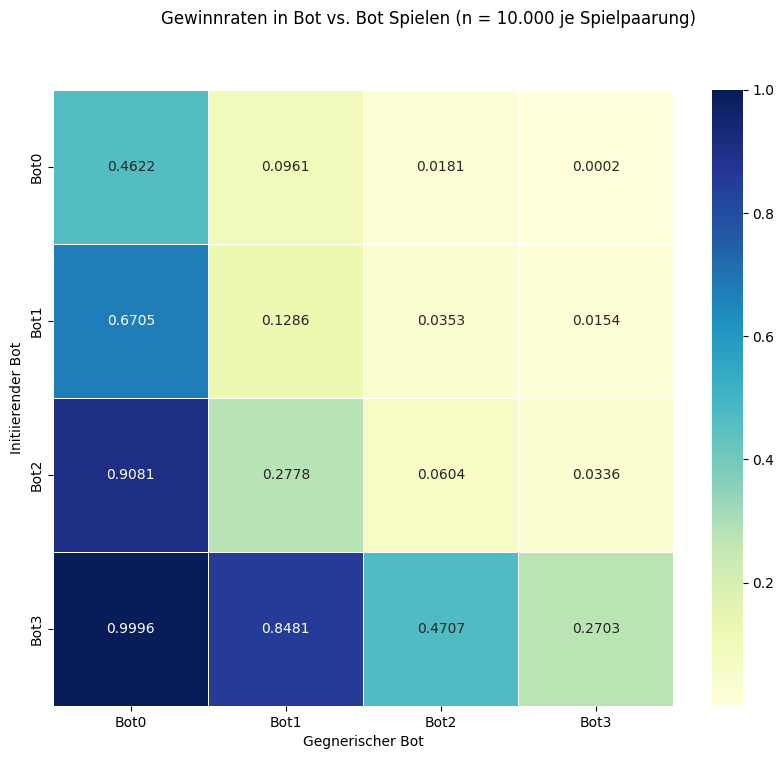

In [104]:
# visualize matrix in seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(win_matrix, annot=True, cmap="YlGnBu", linewidths=.5, cbar=True, fmt=".4f", vmax=1)
plt.suptitle('Gewinnraten in Bot vs. Bot Spielen (n = 10.000 je Spielpaarung)')
plt.xlabel('Gegnerischer Bot')
plt.ylabel('Initiierender Bot')
plt.show()